#Detect object
## problem description
Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos.[1] Well-researched domains of object detection include face detection and pedestrian detection. Object detection has applications in many areas of computer vision, including image retrieval and video surveillance.(wikepedia)

In [1]:
!pip install cvlib
import cvlib 
from cvlib.object_detection import draw_bbox, YOLO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 95.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046383 sha256=7d8f70646b41cde1419b209298f87867b02a58023a945a05ff3f698affcddab5
  Stored in directory: /root/.cache/pip/wheels/bb/11/55/82ced947752cc4056335a4ee9c304a93d43ce857230538f0ae
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12081 sha256=7c9dca64a2e1fe5cb5f480e7339cf0666cc39fd1f16591f0922a01b9805d5fe7
  Stored in directory: /root/.cache/pip/wheels/2c/67/ed/d84123843c937d7e7f5ba88a270d11036473144143355e2747
Successfully built cvlib progressbar


In [2]:
# Download the YOLOv3 model configuration, weights and labels files
!wget https://github.com/yongminli/data/raw/main/yolov3-tiny.cfg -O yolov3-tiny.cfg
!wget https://github.com/yongminli/data/raw/main/yolov3-tiny.weights -O yolov3-tiny.weights
!wget https://github.com/yongminli/data/raw/main/yolov3.txt -O yolov3.txt

# !wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.cfg -O yolov3.cfg
# !wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.weights -O yolov3.weights
# !wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.txt -O yolov3.txt
# path = ""

# Alternatively you can save the data to your Google Drive, and load the data from there
#from google.colab import drive
#drive.mount('/content/drive')
#path = "/content/drive/My Drive/data/"


--2023-01-08 07:31:29--  https://github.com/yongminli/data/raw/main/yolov3-tiny.cfg
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yongminli/data/main/yolov3-tiny.cfg [following]
--2023-01-08 07:31:29--  https://raw.githubusercontent.com/yongminli/data/main/yolov3-tiny.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1915 (1.9K) [text/plain]
Saving to: ‘yolov3-tiny.cfg’

yolov3-tiny.cfg     100%[===================>]   1.87K  --.-KB/s    in 0s      

2023-01-08 07:31:29 (27.3 MB/s) - ‘yolov3-tiny.cfg’ saved [1915/1915]

--2023-01-08 07:31:30--  https://github.com/yongminli/data/raw/main/yolo

In [ ]:


# !wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.cfg -O yolov3.cfg
# !wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.weights -O yolov3.weights
# !wget http://www.brunel.ac.uk/~csstyyl/tmp/yolov3.txt -O yolov3.txt
# path = ""

# Alternatively you can save the data to your Google Drive, and load the data from there
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/data/"


In [ ]:
# The default YOLO model files
config = path + 'yolov3.cfg'
weights = path + 'yolov3.weights'
labels = path + 'yolov3.txt'

# # Alternative the "tiny" version of YOLO, which is faster but less accurate
# config = path + 'yolov3-tiny.cfg'
# weights = path + 'yolov3-tiny.weights'
# labels = path + 'yolov3.txt'

# Construct the YOLOv3 Model
yolo = YOLO(weights, config, labels)


[INFO] Initializing YOLO ..


In [ ]:
# # Load the image files to Google Colab
# from google.colab import files
# file = files.upload()

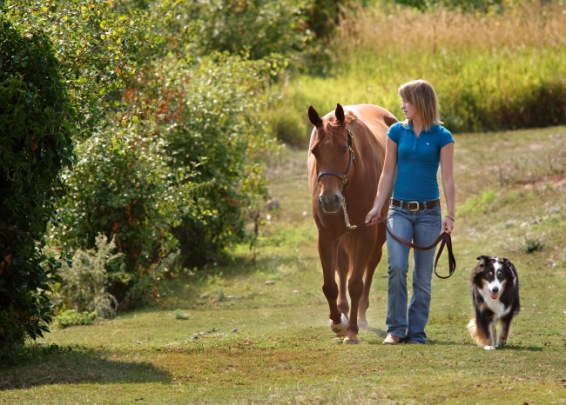

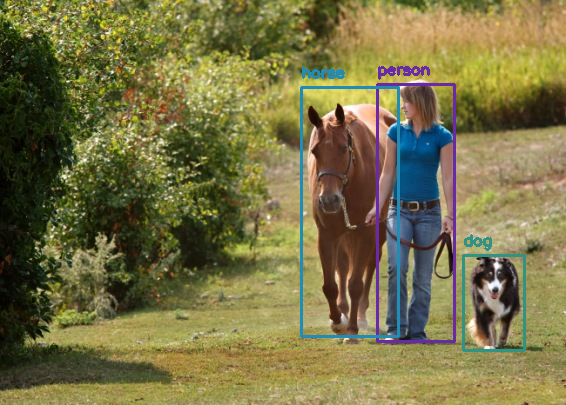

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read an image file
img = cv2.imread(path+'objects.jpg')
# img = cv2.imread(path+'objects2.jpg')
cv2_imshow(img)
print()

# Detect objects from the image, and display the results
bbox, label, conf = yolo.detect_objects(img)
# bbox, label, conf = yolo.detect_objects(img, confidence=0.25, nms_thresh=0.2)
yolo.draw_bbox(img, bbox, label, conf)
cv2_imshow(img)

#discussion
we used both yolo and tiny yolo to perform object detection.

YOLO was created to help improve the speed of slower two-stage object detectors, such as Faster R-CNN.(pyimagessearch)

Since Tiny-YOLO is a smaller version than its big brothers, this also means that Tiny-YOLO is unfortunately even less accurate.

For reference, Redmon et al. report ~51-57% mAP for YOLO on the COCO benchmark dataset while Tiny-YOLO is only 23.7% mAP — less than half of the accuracy of its bigger brothers.(pyimagesearch)


with obvious reasons yolo perfoemed well in terms of accuracy.